# Empirical/ Statistical Models: Climate Extremes 

### Background

We introduced empirial (or statistical) models during the lecture. 

One application for statistical models in climate change - ***and one of the most difficult ones*** - is to estimate the extreme values in the distribution of a climate variable (_like temperature_). 

If we want to estimate the probability of a let's say extreme heat from a dataset, we need to make some assumptions about the statistical distribution of or climate variable. 

In other words, we are applying a statistical model. 

Why does this matther? 

![](https://images.ctfassets.net/cxgxgstp8r5d/entry-cm_53-image/7aded67c2207744ac7cb5bf3b6144086/entry-cm_53-image.gif)
[_Source: Climate Central - The Season of Extreme Heat_](https://www.climatecentral.org/climate-matters/the-season-of-extreme-heat)

In a warming world, we will encounter heat and [extreme heat](https://www.ready.gov/heat) much more frequently.

### Learning Goals

**Climate**

- Importance of extreme values for distaster prepardnes and infrastructure
- Difficulty of accurately modeling extreme values of climate variables
- Understanding definition of climate extremes using probabilities
- Understanding flood return times

**Models**

- Usefulness of statistical models for climate analysis
- Limitation of statistical models for extreme distributions and not seen values

**Programming**

- Using `.groupby` on a dataframe
- Calculating _quantiles_ using `np.quantile()`
- Estimating a normal distribution with `scipy.stats.norm.pdf()`

## Case Study 1:Extreme Temperatures - Normal Distribution Model

For the first part of this analysis, we will be working with temperature data collected a [Phoenix Airport](https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00023183/detail) as part of NOAA's Global Historic Climatology Network. 

You may remember, that Phoenix set temperature records in 2023, [with 54 days with temperatures exeeding 110$^o$F](https://www.pbs.org/newshour/nation/phoenix-hit-110-degrees-on-54-days-in-2023-setting-another-heat-record).

#### Getting Started

We first import `pandas` and some other stadard libaries. The we read the weather station data into a DataFrame, setting the date as an index (like always). 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# I am also setting a figure style
# because available styles vary between versions, this is a bit complicated. Just ignore this.
import re
styles = plt.style.available
style = [x for x in styles if re.search('seaborn-whitegrid', x)]
print(style)
plt.style.use(style)


['seaborn-whitegrid']


In [10]:
weather_phoenix = pd.read_csv('../data/NOAA_GHCN_USW00023183.csv',
                             parse_dates=['DATE'],
                             index_col = ['DATE'])
weather_phoenix.head()

C:\Users\gerkentx\AppData\Local\Temp\ipykernel_8352\3683832410.py:1: DtypeWarning: Columns (16,22,26,28,32,34,38,40,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_phoenix = pd.read_csv('../data/NOAA_GHCN_USW00023183.csv',


,STATION,NAME,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,...,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFI,WSFI_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1934-01-01,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-02,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-03,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-04,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-05,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To make our analyis on extreme heat a bit easier, we focus on summer months only. In meteorology, we define June, July, and August as summer months, which also coincide with highest temperatures. 

To do so, we create a new column `['Month']` in our DataFrame with the month. We have done this before and use the fact that we can extract the month from the date like this: 

In [11]:
weather_phoenix['Month']=weather_phoenix.index.month

After that, we can simply select all data, for which the month is either 6,7 or 8. 

In [12]:
weather_phoenix=weather_phoenix.loc[weather_phoenix['Month'].isin([6,7,8])]
weather_phoenix.head()

,STATION,NAME,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,...,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFI,WSFI_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES,Month
DATE,,,,,,,,,,,,,,,,,,,,,
1934-06-01,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1934-06-02,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1934-06-03,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1934-06-04,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1934-06-05,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


There are quite a few columns in the dataframe, let's only concern ourselves with daily _minimum_ and _maximum_ temperatures. 

In [13]:
T_phoenix = weather_phoenix[['Month','TMIN','TMAX']]

We can look at the summary statistics to see, that the average maximum summer temperature in Phoenix is ~104 F. This is pretty hot!

In [14]:
print(T_phoenix.shape)
T_phoenix.describe()

(7759, 3)


,Month,TMIN,TMAX
count,7759.000000,7758.000000,7758.000000
mean,7.006960,78.432586,104.398814
std,0.815045,7.273761,5.742510
min,6.000000,50.000000,73.000000
25%,6.000000,74.000000,101.000000
50%,7.000000,79.000000,105.000000
75%,8.000000,84.000000,108.000000
max,8.000000,97.000000,122.000000


Another thing we notice, is that ther are 7759 entries (rows) in the dataframe, but only 7758 values for `TMIN` and `TMAX`. This means we have one missing value, which we should eliminate from the analysis. 

We can do this using the `.dropna()` command, which will eliminate rows with missing (`nan`) values. 

In [15]:
T_phoenix=T_phoenix.dropna()

We expect changing tempertures due to global warming. Because there is a lot of variability in climate, we always look at 30-year intervals analyse climate change. These are called [climate normals](https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals). The current one is from 1990 to 2020. 

This means the record tempertures in Phoenix last summer are not yet part of the official current climate. 

Let's select the current climate normal (1990-2020) and the first 3 complete decades in the dataset (1940-1970) and assign them to new dataframes. 

In [16]:
T_phoenix_current = weather_phoenix[['TMIN','TMAX']].loc["1990":"2020"]
T_phoenix_40to70 = weather_phoenix[['TMIN','TMAX']].loc["1940":"1970"]

We can then plot histograms, to check whether there is any apparent warming. 

Text(0.5, 0, 'Max T ($^o$F)')

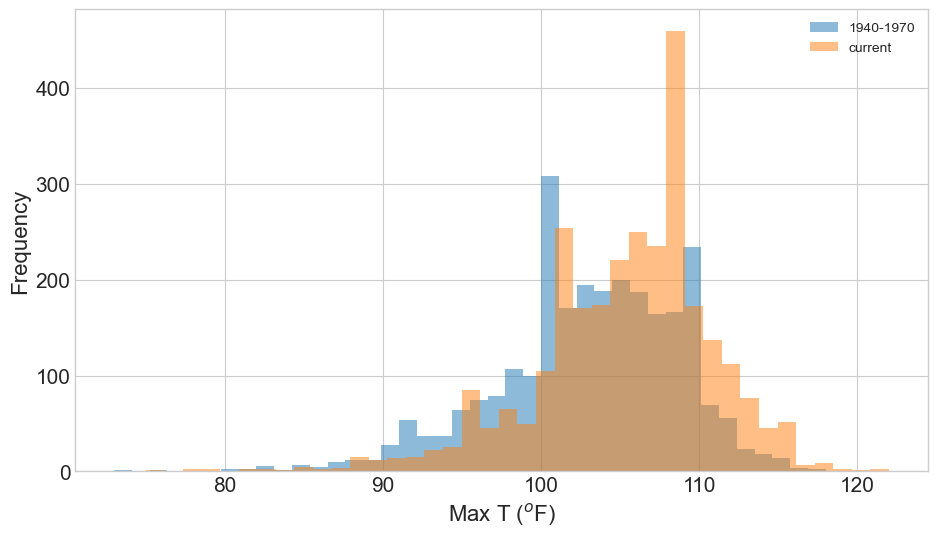

In [17]:
fig, ax = plt.subplots(figsize=(11, 6))

T_phoenix_40to70.plot(kind='hist',y='TMAX', bins = 40,ax=ax,alpha=0.5, label = '1940-1970')
T_phoenix_current.plot(kind='hist',y='TMAX', bins = 40,ax=ax,alpha=0.5, label = 'current', fontsize = 15)

ax.set_ylabel('Frequency', fontsize = 16)
ax.set_xlabel('Max T ($^o$F)',fontsize = 16)



As we might expect, maximum temperatures seem to have shifted upwards. It looks as if the complete distribution has shifted to the right. 

We can make this analysis a bit more quantitative, by looking at the [quantiles](https://en.wikipedia.org/wiki/Quantile) of the maximum temperature distribution.

We can calculate these easily, using numpy's `.quantile()` function.

We then create a quick scatter plot. 

[ 87.  95. 100. 104. 107. 110. 111. 114.]
[ 89.  98. 102. 106. 109. 112. 113. 116.]


Text(0.5, 0, 'Quantiles Current')

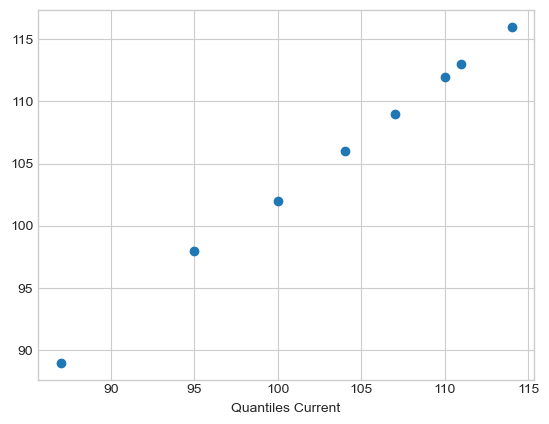

In [18]:
quantiles = [0.01,0.10,0.25,0.5,0.75,0.9,0.95,0.99]
quantiles_40_70=np.quantile(T_phoenix_40to70['TMAX'],quantiles)
quantiles_current=np.quantile(T_phoenix_current['TMAX'],quantiles)

print(quantiles_40_70)
print(quantiles_current)

fig, ax = plt.subplots()
plt.scatter(quantiles_40_70,quantiles_current)
ax.set_xlabel('Quantiles 1940-1970')
ax.set_xlabel('Quantiles Current')

From the plot above (and the calculated quantiles), we see that the entire distribution has shifted by 2 $^o$F (Note: the dataset is rounded to whole numbers).

This change is plausible as [Arizona as a whole has warmed about 2 $^o$F in the last 100 years](https://19january2017snapshot.epa.gov/sites/production/files/2016-09/documents/climate-change-az.pdf).

### A statistical model for the temperature distribution

For the remainder of the analysis, we will focus on the current climate period. 

We will fist a statistical model to the observed data and then compare the model derived values to the observations. 

Let's first plot the distribution again. 

Instead of plotting a normal histogram, which gives the counts on the `y-axis`, we can use the `density = True` parameter, to translate this into probabilities, for each temperature. 

Text(0.5, 0, 'Max T ($^o$F)')

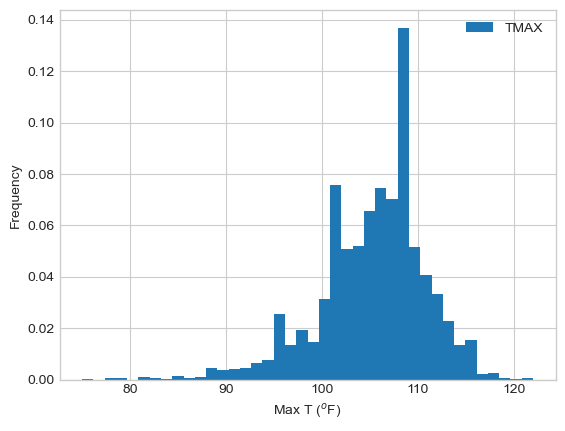

In [19]:
fig, ax = plt.subplots()
T_phoenix_current.plot(kind='hist',y='TMAX', bins = 40, density=True, ax=ax)
ax.set_xlabel('Max T ($^o$F)')

For lack of a better understanding of our dataset, we assume that `TMAX` is normally distributed (i.e. follows a bell-curve). 

A normal distribution can be fully described using its _mean_ and _standard deviation_. 

We can directly extract them from our dataset using the `.mean()`,`.std()` functions. We also need the `.min()`, `.max()` for later. 

In [20]:
xmin = T_phoenix_current['TMAX'].min() 
xmax = T_phoenix_current['TMAX'].max()
mean = T_phoenix_current['TMAX'].mean()
std = T_phoenix_current['TMAX'].std ()

print('Mean: ', mean, 'Std: ', std)

Mean:  105.33309957924264 Std:  5.625814735796146


Using the `norm` module from the `scipy.stats` package, we can then get the corresponding Normal-Distribution. To facilitate plotting, we calculate the probabilities for 100 values between the minimum and maximum values for `TMAX`. 

And plot the normal distribution over the observed frequency distribution. 

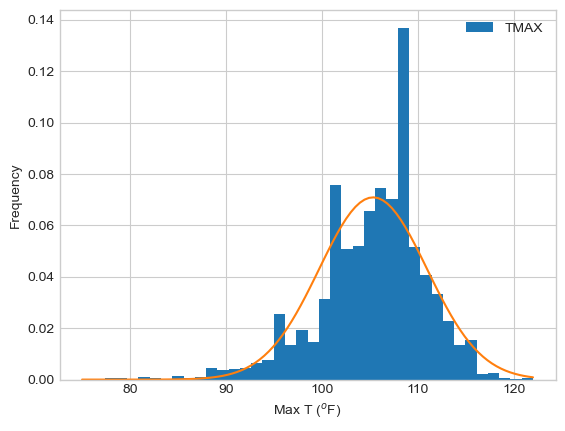

In [21]:
from scipy.stats import norm
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)


fig, ax = plt.subplots()
T_phoenix_current.plot(kind='hist',y='TMAX', bins = 40, density=True, ax=ax)

plt.plot(x,y)
ax.set_xlabel('Max T ($^o$F)')
plt.show()


Overall, this looks plausible.

### Looking at the heat extremes

Now let's look at the extreme values. 

We can compare the 99th-percentile of heat from observations to the normally distributed model. 

In [22]:
print('T Obs (99th percentile):', np.quantile(T_phoenix_current['TMAX'],.99))
print('T Model (99th percentile):', norm.ppf(0.99, loc=mean, scale=std))

T Obs (99th percentile): 116.0
T Model (99th percentile): 118.42070172960965


We can see that the model actually overestimates extreme temperatures at the 99th percentile by more than 2$^o$F. 

Let's investigate this more thoroughly, by looking at the observed and calculated probabilities for several values of `TMAX`. 

We select temperatures from 100 to 120 F: `temperatures = [100,105,110,115,120]`

In [23]:
df = pd.DataFrame()
temperatures = [100,105,110,115,120]
df['Temperature'] = temperatures
df

,Temperature
0,100
1,105
2,110
3,115
4,120


And add the theoretical probabilities for them. 

In [24]:
df['Pct_norm']=(1-norm.cdf(temperatures, loc=mean, scale=std))*100
df

,Temperature,Pct_norm
0,100,82.842745
1,105,52.360723
2,110,20.339634
3,115,4.286993
4,120,0.456602


And not the observed probabilities:

In [27]:
from scipy.stats import percentileofscore
# percentile of score does exactly the reverse of calculating the percentil of an observation. 
# We give it a temperature and it returns the correct percentile. 

pct_obs =[]
for temp in temperatures:
    pct_obs.append(100-percentileofscore(T_phoenix_current['TMAX'],temp))

df['Pct_obs']=(pct_obs)
df


,Temperature,Pct_norm,Pct_obs
0,100,82.842745,85.203366
1,105,52.360723,58.537868
2,110,20.339634,18.548387
3,115,4.286993,1.998597
4,120,0.456602,0.070126


Finally, we add the ratio of theoretical and observed probabilites. 

In [28]:
df['R_Pct_NormObs']=df['Pct_norm']/df['Pct_obs']
df

,Temperature,Pct_norm,Pct_obs,R_Pct_NormObs
0,100,82.842745,85.203366,0.972294
1,105,52.360723,58.537868,0.894476
2,110,20.339634,18.548387,1.096572
3,115,4.286993,1.998597,2.145001
4,120,0.456602,0.070126,6.511139


Text(0.5, 0, 'TMAX ($^o$F)')

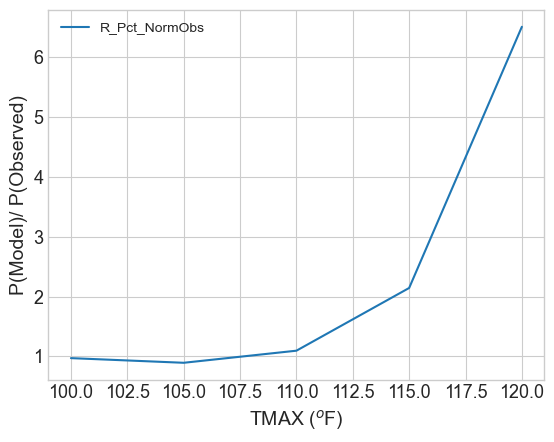

In [29]:
fig, ax = plt.subplots()
df.plot(x='Temperature',y='R_Pct_NormObs', ax=ax, fontsize =13)
ax.set_ylabel('P(Model)/ P(Observed)',fontsize=14)
ax.set_xlabel('TMAX ($^o$F)',fontsize=14)

#### Key Take-Aways: Heat

- Our theoretical model appears to be getting exponentially worse, as we go to more extreme temperatures. 
- This makes sense, as the model is fitted using mean temperatures and does not account for extreme values. 
- In this case is is overestimating heat, but just the opposite could have happened, if the observed distribution would have been different. 
- Our model does not include climate change. 
    - If the climate would warm by 2.5 degrees F, even this model would understimate extreme heat. 
    - We are currently [on track for a global increase of temperatures of ~7 F](https://www.nytimes.com/interactive/2021/10/25/climate/world-climate-pledges-cop26.html).
    - This will mean much higher temperatures in Phoenix

## Case Study 2: River Discharge and Return Periods

_Note: This methods for this case study are adapted from the [following activity](https://serc.carleton.edu/hydromodules/steps/166250.html) via [VT Hydroinformatics](https://vt-hydroinformatics.github.io/floods.html#template-repository)._

Flood return periods are extremely important, when designing infrasturture, such as bridges over rivers. Instrastucture tends to be planned to withstand flood return periods of 500 or 1000 years. 

A flood with a return period of [100-years](https://en.wikipedia.org/wiki/100-year_flood) is often referred to as a reference flood period.

Because, we don't have observations that span 500 (or often even 100) years, these stream discharge levels (and thus the river height) associated with these flood events can only be derived using models. 

For this case study we use the same data as in the `W4_1_ClimateData` excercise: USGS Streamflow data collected at the North River near Burketown, VA.

We read the data assing a 'Year' column and remove missing values with `.dropna()`.

In [30]:
dischargeData = pd.read_csv('../../W4_1_ClimateData/data/USGS_01622000.txt', 
                        skiprows=31,
                        delimiter='\t', 
                        names = ['agency', 'stationID', 'date','discharge_cfs','label'], # I am
                        parse_dates = ['date'],
                        index_col = ['date'])
dischargeData = dischargeData.dropna() 
dischargeData['Year']=dischargeData.index.year 
dischargeData.head()

,agency,stationID,discharge_cfs,label,Year
date,,,,,
1927-01-01,USGS,1622000,684.0,A,1927
1927-01-02,USGS,1622000,610.0,A,1927
1927-01-03,USGS,1622000,573.0,A,1927
1927-01-04,USGS,1622000,492.0,A,1927
1927-01-05,USGS,1622000,455.0,A,1927


For our analyis, we will focus on the maximum riverflow (discharge) in each year. We can get this, by using the `.groupby()` operator on the `'Year'` column and using `.max()` as the aggregator function. 

In [31]:
yearly_max_discharge = dischargeData[['Year','discharge_cfs']].groupby('Year').max()
yearly_max_discharge.head()

,discharge_cfs
Year,
1927,3490.0
1928,5260.0
1929,4400.0
1930,1070.0
1931,1390.0


A quick plot, shows that most years the maximum discharge is around 5000 cfs, but some years had much higher maximum discharges. 

<AxesSubplot:xlabel='Year'>

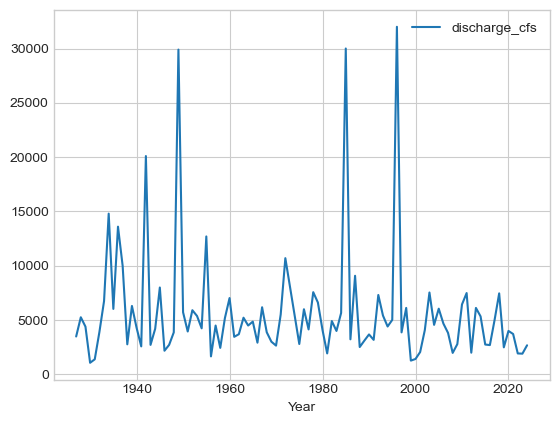

In [32]:
yearly_max_discharge.plot(y='discharge_cfs')

A histogram shows, that this data is clealy not normally distributed. There is a tail with very high discharges. 

<AxesSubplot:ylabel='Frequency'>

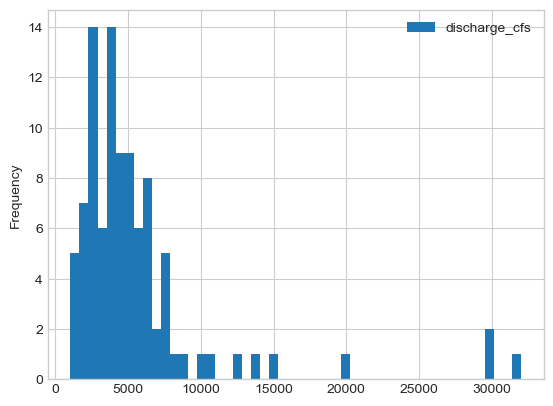

In [33]:
yearly_max_discharge.plot(kind='hist',y='discharge_cfs', bins = 50)

We can confirm this by overlaying a normal distribution, like in the temperature case study. 

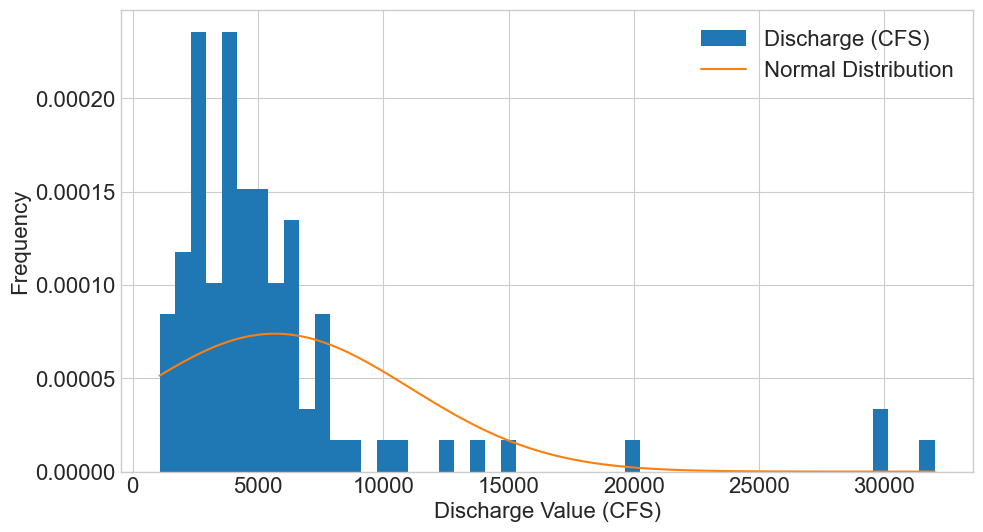

In [34]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(11, 6))
yearly_max_discharge.plot(kind='hist',y='discharge_cfs', bins = 50, density = True, 
                          label = 'Discharge (CFS)',
                          ax = ax,
                         fontsize = 16)

xmin, xmax, mean, std = [yearly_max_discharge['discharge_cfs'].min(), yearly_max_discharge['discharge_cfs'].max(), 
        yearly_max_discharge['discharge_cfs'].mean(), yearly_max_discharge['discharge_cfs'].std()]

x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)

plt.plot(x,y, label = 'Normal Distribution')

ax.set_ylabel("Frequency",fontsize = 16)
ax.set_xlabel("Discharge Value (CFS)",fontsize = 16)

plt.legend(fontsize = 16)
plt.show()

We need to fit these data to a distribution in order to make a relationship we can use to predict the discharge of specific return intervals.

If a normal model does not work, we can think about some other distribution that is more likely to fit. 

#### Gumbel Distribution

There are many distributions that can be used in this situation, but a common one for flood frequency analyses is the [Gumbel extreme value distribution](https://en.wikipedia.org/wiki/Gumbel_distribution):

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Gumbel-Density.svg/650px-Gumbel-Density.svg.png)

But first, let's use our data to calculate the observed return periods. To do so, we can define a function that does just that. 
I am borrowing this function from the [Earth Data Science Textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/floods-return-period-and-probability/):

In [35]:
def calculate_return(df, colname):
    '''
    Add Documentation Here


    '''
    # Sort data smallest to largest
    sorted_data = df.sort_values(by=colname)
    
    # Count total obervations
    n = sorted_data.shape[0]
    
    # Add a numbered column 1 -> n to use in return calculation for rank
    #sorted_data.insert(0, 'rank', range(1, 1 + n))
    sorted_data['rank']=range(1, 1 + n) # small change to allow for re-run
    
    # Calculate probability
    sorted_data["probability"] = (n - sorted_data["rank"] + 1) / (n + 1)
    
    # Calculate return - data are daily to then divide by 365?
    sorted_data["return-time"] = (1 / sorted_data["probability"])
    
    
    return(sorted_data)

We can now apply this function to our dataset. The dataset is now orderby by `discharge_cfs`, and each discharge value has a probability and a return time in years, associated with it. 

In [36]:
yearly_max_discharge=calculate_return(yearly_max_discharge,'discharge_cfs')
yearly_max_discharge

,discharge_cfs,rank,probability,return-time
Year,,,,
1930,1070.0,1,0.989691,1.010417
1999,1270.0,2,0.979381,1.021053
1931,1390.0,3,0.969072,1.031915
2000,1420.0,4,0.958763,1.043011
1956,1660.0,5,0.948454,1.054348
...,...,...,...,...
1934,14800.0,92,0.051546,19.400000
1942,20100.0,93,0.041237,24.250000
1949,29900.0,94,0.030928,32.333333


We can plot this as a discharge vs return period plot, which is quite common in hydrology. 

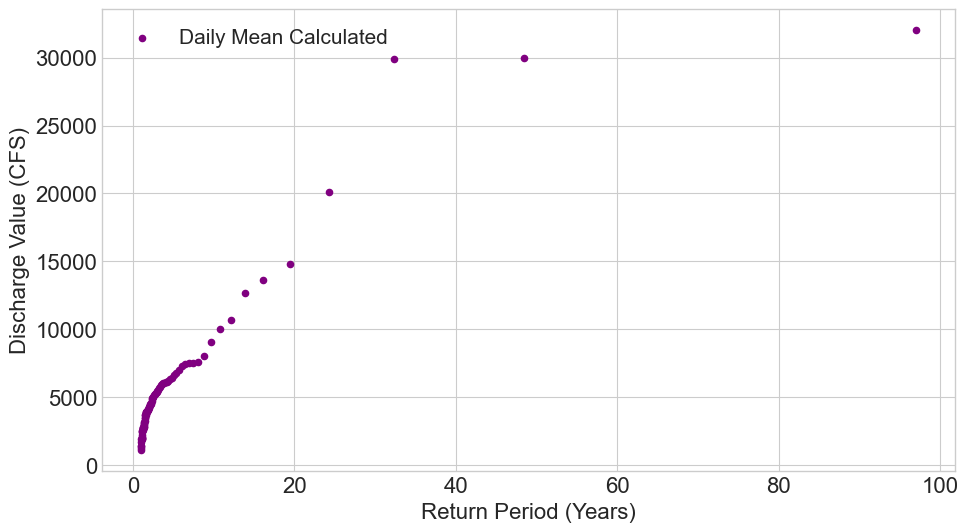

In [37]:
fig, ax = plt.subplots(figsize=(11, 6))
plt.style.use('seaborn-whitegrid')
yearly_max_discharge.plot.scatter(y="discharge_cfs",
                           x="return-time",
                           ax=ax,
                           color='purple',
                           fontsize=16,
                           label="Daily Mean Calculated")

ax.legend(frameon=False,
         fontsize = 15)

ax.set_xlabel("Return Period (Years)",fontsize = 16)
ax.set_ylabel("Discharge Value (CFS)",fontsize = 16)

plt.show()

Next, we will fit the `Gumbel Distribution`. It's parameters can be estimated from the distribution like below. 
Details about that can be found [here](https://vt-hydroinformatics.github.io/floods.html#template-repository), but they don't really matter at this point too much. 

In [38]:
def gumbel_dist(x,u,alpha):
     return np.exp(-np.exp(-((x - u) / alpha)))
    
def fit_gumbel(x):
    xbar  = np.mean(x)
    sx = np.std(x)
    alpha = (np.sqrt(6)*sx) / np.pi
    u = xbar - (0.5772 * alpha)
    
    return (gumbel_dist(x,u,alpha), u, alpha)

We can use the fitted distribution to then assinge theoretical probabilites and return periods. 

In [39]:
p_gumbel, u, alpha = fit_gumbel(yearly_max_discharge['discharge_cfs'])
yearly_max_discharge['P_Model_(Gumbel)']= 1-p_gumbel
yearly_max_discharge['return-time_Model(Gumbel)']= 1/(yearly_max_discharge['P_Model_(Gumbel)'])
yearly_max_discharge

,discharge_cfs,rank,probability,return-time,P_Model_(Gumbel),return-time_Model(Gumbel)
Year,,,,,,
1930,1070.0,1,0.989691,1.010417,0.814592,1.227608
1999,1270.0,2,0.979381,1.021053,0.799432,1.250889
1931,1390.0,3,0.969072,1.031915,0.790119,1.265633
2000,1420.0,4,0.958763,1.043011,0.787766,1.269412
1956,1660.0,5,0.948454,1.054348,0.768627,1.301021
...,...,...,...,...,...,...
1934,14800.0,92,0.051546,19.400000,0.061509,16.257908
1942,20100.0,93,0.041237,24.250000,0.017745,56.353772
1949,29900.0,94,0.030928,32.333333,0.001723,580.523443


**Yikes!**

The fitted model, assigns a return time of almost 1000 years to our 1996 flood. **It grossly underestimates the probabilities for the large observed flood events!** 

Clearly, if we had build bridges to withstand a 500-year flood using this model, we would have been wiped out 3 times witin the last 90 years. 

Let's look at this in graph form. 

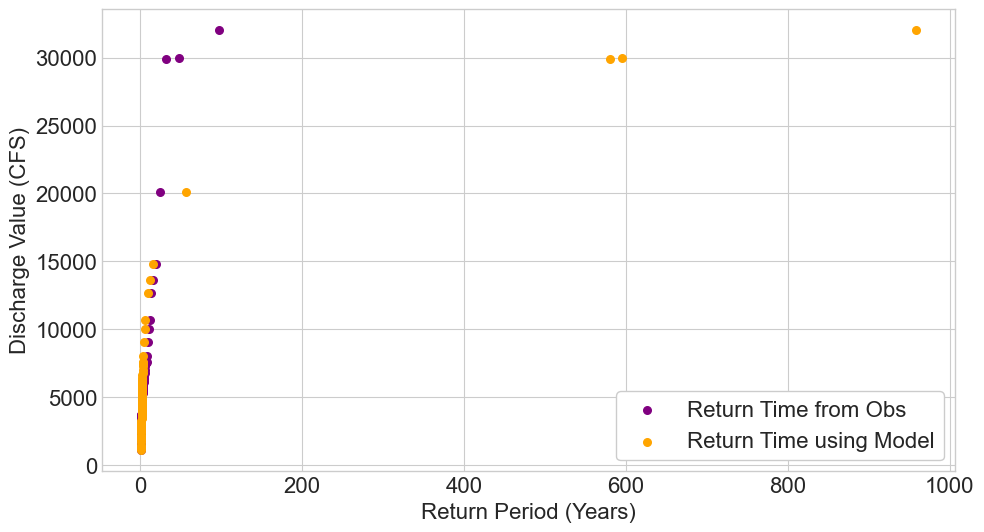

In [40]:
fig, ax = plt.subplots(figsize=(11, 6))
plt.style.use('seaborn-whitegrid')
yearly_max_discharge.plot.scatter(y="discharge_cfs",
                           x="return-time",
                           #title="Return Period (Years)",
                           ax=ax,
                           color='purple',
                           s = 30,
                           fontsize=16,
                           label="Return Time from Obs")

yearly_max_discharge.plot.scatter(y="discharge_cfs",
                           x="return-time_Model(Gumbel)",
                           #title="Return Period (Years)",
                           ax=ax,
                           color='orange',
                           s = 30,
                           fontsize=16,
                           label="Return Time using Model")

ax.legend(frameon=True,
          framealpha=1.,
         fontsize = 16)

ax.set_xlabel("Return Period (Years)", fontsize = 16)
ax.set_ylabel("Discharge Value (CFS)", fontsize = 16)

plt.show()


#### Key Take-Aways: Flood return

- We rarely have long enough time-series data to fully undertstand the underlying distribution. 
- This means we rely on models to do so. 
- For non-normally distributed data, we need non-Gaussian models. 
- The Gumbel distritbution is one example, but there are many others.
    - The choice of model can be very important.  
- In this case, the fitted model grossly underestimates flood risk, which could have catastrophic real world consequences
    - Another model, might have done much better, but we might not have good enough data to evaluate the chose model.    
- We run into the same issue, our statistical model is much worse at the extremes than for the parts of the distribution that are better supported with data. 
- **This is a general problem predicting extremes is extremely difficult.**